In [1]:
!head listings.csv

id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,cal

In [2]:
from csv import DictReader
import numpy as np

number_of_reviews = []
review_scores_value = []

for appartment in DictReader(open('listings.csv', encoding='utf-8')):
    if appartment['review_scores_value'] == '':
        appartment['review_scores_value'] = np.nan
    number_of_reviews.append(appartment['number_of_reviews'])
    review_scores_value.append(appartment['review_scores_value'])
    #print(appartment)
    #break
    
#number_of_reviews
review_scores_value

['9',
 '10',
 '9',
 '9',
 '9',
 '10',
 '9',
 nan,
 '9',
 '10',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '9',
 '9',
 nan,
 '9',
 '10',
 '9',
 '9',
 '9',
 '10',
 '10',
 '9',
 '8',
 '8',
 '9',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 nan,
 '10',
 '9',
 nan,
 nan,
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '10',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '10',
 '10',
 '8',
 '10',
 '10',
 '10',
 '9',
 '9',
 '10',
 '9',
 '9',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '10',
 '10',
 '9',
 '9',
 '10',
 '8',
 '9',
 '9',
 '10',
 '9',
 '9',
 '10',
 '9',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 '10',
 '10',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 nan,
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '8',
 '10',
 '8',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '8',
 '9',
 '9',
 '9',
 '9',
 '8',
 '8',
 '10',
 '10',
 nan,
 '9',
 '9',
 '10',
 '9',
 '10',
 '9',
 '10',
 '10',
 '10',
 '9',
 '8',

In [3]:
#import numpy as np
#print(review_scores_value.count(''))
#print(len(review_scores_value))
number_of_reviews = np.array(number_of_reviews, dtype = np.int32)
review_scores_value = np.array(review_scores_value, dtype = np.float32)
#review_scores_value = np.array([x if x != '' else '0' for x in review_scores_value], dtype = np.float32)
#number_of_reviews
review_scores_value

array([ 9., 10.,  9., ..., nan, nan, nan], dtype=float32)

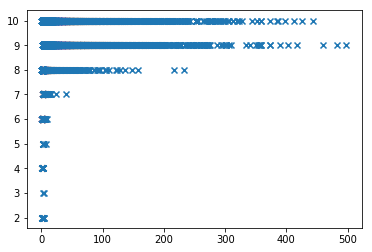

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(number_of_reviews, review_scores_value, marker='x')

In [5]:
#np.where(review_scores_value == np.nan) # won't work
nan_indices = np.where(np.isnan(review_scores_value))
nan_indices[0].shape
review_scores_value_no_nan = np.delete(review_scores_value, nan_indices)
number_of_reviews_no_nan = np.delete(number_of_reviews, nan_indices)
print(f'elements before {review_scores_value.shape}')
print(f'elements before {number_of_reviews.shape}')
print(f'elements after {review_scores_value_no_nan.shape}')
print(f'elements after {number_of_reviews_no_nan.shape}')

elements before (22552,)
elements before (22552,)
elements after (18117,)
elements after (18117,)


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = number_of_reviews_no_nan.reshape(-1, 1)
model.fit(X, review_scores_value_no_nan)
model.coef_

array([0.00010346])

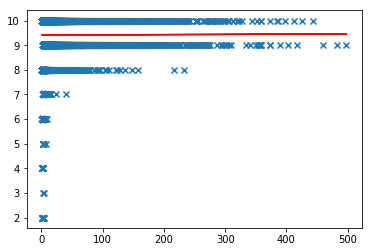

In [7]:
Y_pred = model.predict(X)
plt.scatter(X, review_scores_value_no_nan, marker='x')
plt.plot(X, Y_pred, c='red')

In [8]:
lat = []
lon = []
bedrooms = []
price = []

for appartment in DictReader(open('listings.csv', encoding='utf-8')):
    if appartment['latitude'] == '':
        appartment['latitude'] = np.nan
    if appartment['longitude'] == '':
        appartment['longitude'] = np.nan
    if appartment['bedrooms'] == '':
        appartment['bedrooms'] = np.nan        
    if appartment['price'] == '':
        appartment['price'] = np.nan
    lat.append(appartment['latitude'])
    lon.append(appartment['longitude'])
    bedrooms.append(appartment['bedrooms'])
    price.append(appartment['price'])
    
price_no_currency = [p.replace('$','').replace(',','') for p in price]

lat = np.array(lat, dtype = np.float32)
lon = np.array(lon, dtype = np.float32)
bedrooms = np.array(bedrooms, dtype = np.float32)
price_no_currency = np.array(price_no_currency, dtype = np.float32)

In [9]:
lat_nan_indices = np.where(np.isnan(lat))
lon_nan_indices = np.where(np.isnan(lon))
bedrooms_nan_indices = np.where(np.isnan(bedrooms))
price_nan_indices = np.where(np.isnan(price_no_currency))

lat_no_nan = np.delete(lat, lat_nan_indices)
lat_no_nan = np.delete(lat_no_nan, lon_nan_indices)
lat_no_nan = np.delete(lat_no_nan, bedrooms_nan_indices)
lat_no_nan = np.delete(lat_no_nan, price_nan_indices)

lon_no_nan = np.delete(lon, lat_nan_indices)
lon_no_nan = np.delete(lon_no_nan, lon_nan_indices)
lon_no_nan = np.delete(lon_no_nan, bedrooms_nan_indices)
lon_no_nan = np.delete(lon_no_nan, price_nan_indices)

bedrooms_no_nan = np.delete(bedrooms, lat_nan_indices)
bedrooms_no_nan = np.delete(bedrooms_no_nan, lon_nan_indices)
bedrooms_no_nan = np.delete(bedrooms_no_nan, bedrooms_nan_indices)
bedrooms_no_nan = np.delete(bedrooms_no_nan, price_nan_indices)

price_no_nan = np.delete(price_no_currency, lat_nan_indices)
price_no_nan = np.delete(price_no_nan, lon_nan_indices)
price_no_nan = np.delete(price_no_nan, bedrooms_nan_indices)
price_no_nan = np.delete(price_no_nan, price_nan_indices)

print(f'elements lat {lat_no_nan.shape}')
print(f'elements lon {lon_no_nan.shape}')
print(f'elements bedrooms {bedrooms_no_nan.shape}')
print(f'elements price {price_no_nan.shape}')

elements lat (22534,)
elements lon (22534,)
elements bedrooms (22534,)
elements price (22534,)


elements (22534, 3)


/opt/conda/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


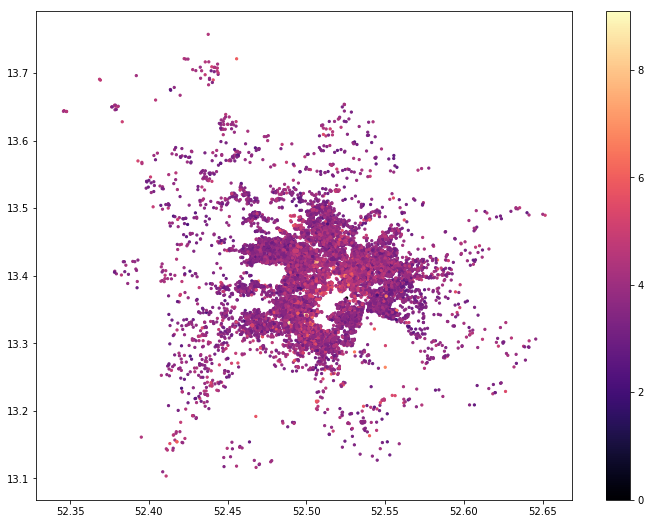

In [27]:
#model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer
#model = RandomForestRegressor(n_estimators = 100)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#model = make_pipeline(Normalizer(norm='l2'), PolynomialFeatures(20), LinearRegression())
model = make_pipeline(Normalizer(), RandomForestRegressor(n_estimators = 10))

lat_no_nan = lat_no_nan.reshape(-1, 1)
lon_no_nan = lon_no_nan.reshape(-1, 1)
bedrooms_no_nan = bedrooms_no_nan.reshape(-1, 1)
X = np.hstack((lat_no_nan, lon_no_nan, bedrooms_no_nan))

print(f'elements {X.shape}')

#transformer = Normalizer().fit(X)
#X_normalized = transformer.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, price_no_nan, test_size = 0.5)

#model.fit(X, price_no_nan)
#model.coef_
model.fit(X_train, Y_train)

#Y_pred = model.predict(X)
Y_pred = model.predict(X_train)
#print(f'{X[:, 0].shape}')

plt.rcParams["figure.figsize"] = (12, 9)
plt.scatter(X[:, 0], X[:, 1], c=np.log(price_no_nan), cmap='magma', s = 5)
plt.colorbar()

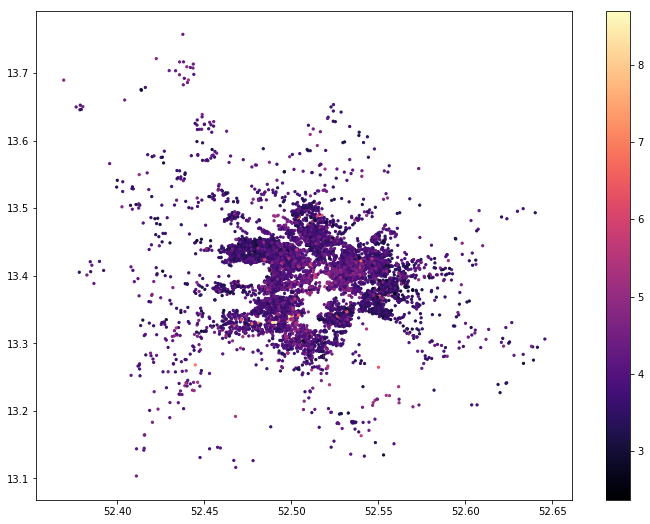

In [28]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.log(Y_pred), cmap='magma', s = 5)
plt.colorbar()

In [30]:
print(f'Training score: {model.score(X_train, Y_train)}')
print(f'Test score: {model.score(X_test, Y_test)}')

from sklearn.model_selection import cross_val_score

for i in range(1, 10):
    cvmodel = make_pipeline(Normalizer(), RandomForestRegressor(n_estimators = i))
    print(f'Mean CV5 score for n = {i}: {np.mean(cross_val_score(cvmodel, X, price_no_nan, cv = 5, scoring = "neg_mean_squared_error"))}')
          
from sklearn.metrics import mean_squared_error
print(f'Train MSE: {mean_squared_error(model.predict(X_train), Y_train)}')
print(f'Test MSE: {mean_squared_error(model.predict(X_test), Y_test)}')

np.mean(np.square(Y_test - model.predict(X_test)))

Training score: 0.8137010419866896
Test score: -0.13424095234541222
Mean CV5 score for n = 1: -80018.33933487648
Mean CV5 score for n = 2: -73149.48118656149
Mean CV5 score for n = 3: -66189.22734935179
Mean CV5 score for n = 4: -66759.63731607182
Mean CV5 score for n = 5: -64718.95043758759
Mean CV5 score for n = 6: -63547.38122347195
Mean CV5 score for n = 7: -63268.86932003412
Mean CV5 score for n = 8: -60475.35882607904
Mean CV5 score for n = 9: -63787.3247051928
Train MSE: 8867.790435369223
Test MSE: 56151.93853439363


56151.93853439363

Strange is, that test score an cv score are that different.


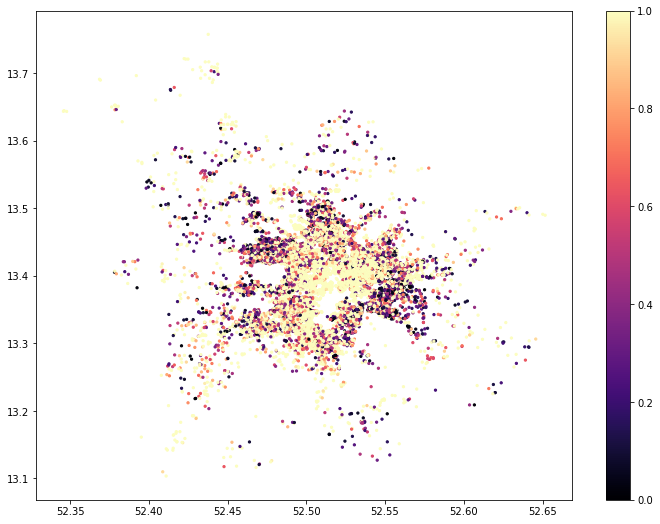

In [22]:
bins = list(range(50))
quintiles = np.percentile(Y_pred[np.nonzero(Y_pred)], bins)
Y_pred_visualization = np.searchsorted(quintiles, Y_pred) / len(bins)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_pred_visualization, cmap='magma', s = 5)
plt.colorbar()